# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 3.5

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_fetch = requests.get(btc_url)
bdata = btc_fetch.json()
btc_price = bdata['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_fetch = requests.get(eth_url)
edata = eth_fetch.json()
eth_price = edata['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $39775.20
The current value of your 3.5 ETH is $6925.20


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api = os.getenv("ALPACA_API")
alpaca_secret = os.getenv("ALPACA_SECRET")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api,
    alpaca_secret,
    api_version = "v2"
)

In [8]:
# Format current date as ISO format
start_date = pd.Timestamp("2021-05-14", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY "2015-05-04"and AGG
ticker_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Preview DataFrame
ticker_data.head()

AGG                                       SPY  \
                             open    high       low   close   volume   open   
time                                                                          
2021-05-14 00:00:00-04:00  114.22  114.28  114.1219  114.28  3711363  413.2   

                                                             
                             high     low   close    volume  
time                                                         
2021-05-14 00:00:00-04:00  417.49  413.18  416.53  69012933

In [9]:
# Pick AGG and SPY close prices
agg_close_price = ticker_data["AGG"]["close"][-1]
spy_close_price = ticker_data["SPY"]["close"][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.28
Current SPY closing price: $416.53


In [10]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20826.50
The current value of your 200 AGG shares is $22856.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
values = [(my_btc_value + my_eth_value), (my_agg_value + my_spy_value)]
df_savings = pd.DataFrame(values, index=['crypto', 'shares'], columns=['amount'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,46700.405
shares,43682.500


<AxesSubplot:ylabel='amount'>

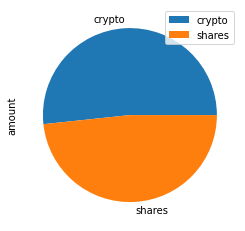

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y='amount')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = round(df_savings['amount'].sum(),2)

# Validate saving health
if emergency_fund < total_savings:
    print(f"Congratulations, your savings of ${total_savings} exceeds the emergency fund goal of ${emergency_fund}, time to start investing!")
elif emergency_fund == total_savings:
    print(f"Contragulations, your savings of ${total_savings} meets the emergency fund goal of ${emergency_fund}, time to start saving for investing!")
else:
    print(f"Your total savings of ${total_savings} is ${emergency_fund - total_savings} short of the emergency fund goal.")

Congratulations, your savings of $90382.9 exceeds the emergency fund goal of $36000, time to start investing!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-14', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-14', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open    high       low    close     volume   
time                                                                      
2017-05-24 00:00:00-04:00  109.25  109.50  109.2115  109.450  2325960.0   
2017-05-25 00:00:00-04:00  109.45  109.49  109.3701  109.460  1382257.0   
2017-05-26 00:00:00-04:00  109.46  109.54  109.4400  109.480   853245.0   
2017-05-30 00:00:00-04:00  109.58  109.66  109.5400  109.635  1199625.0   
2017-05-31 00:00:00-04:00  109.64  109.81  109.6400  109.750  2011554.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2017-05-24 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2017-05-25 00:00:00-04:00  241.20  242.08  240.96  241.71  45278321.0  
2017-05-26 00:00:00-04:00  241.55  241.90  241.45  241.74  30002081.0  
2017-05-30 00:00:00-04:00  241.33  241.79  241.16  241.52  28437351.0  
2017-05-31 00:00:00-04:00  241.84  241.88  240.64  241.42  59140588.0

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500
MC_agg_spy = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = num_sims,
    num_trading_days = 7560
)

In [17]:
# Printing the simulation input data


In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_agg_spy.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994079,1.000395,0.990077,1.005041,1.000226,0.986373,1.003620,1.019503,0.992752,1.004823,...,0.997588,1.011687,1.007051,0.986582,0.984201,1.001934,1.009669,1.009829,1.006160,1.001789
2,0.993054,1.001186,0.995111,1.001455,0.991027,0.985958,0.996230,1.023507,1.006414,1.003988,...,0.978974,1.010185,0.996936,0.992788,0.988945,1.002526,1.015992,0.992900,1.022468,1.003401
3,0.985828,1.010770,0.986908,0.992893,0.986915,0.987042,0.992501,1.023031,1.005552,1.014106,...,0.977140,1.024780,1.013584,1.008872,1.001032,1.008842,1.027353,1.003678,1.015262,0.993363
4,0.987662,1.027518,0.993780,0.987202,0.988458,0.980773,0.990891,1.028163,1.006234,1.019775,...,0.979000,1.027995,1.002882,1.010834,0.989086,0.992687,1.025175,1.000905,1.016765,1.006048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.514364,20.196715,12.767026,69.296390,17.685032,11.578544,17.605687,105.389958,12.400834,18.232985,...,7.297362,11.502696,16.871326,5.692272,13.047669,8.596941,11.527919,12.255626,9.713148,7.876396
7557,8.489244,20.090423,12.831218,69.933445,17.611222,11.606002,17.461172,105.848866,12.311776,18.144223,...,7.183367,11.543836,16.824438,5.702023,13.065429,8.473323,11.531300,12.158107,9.604177,7.914558
7558,8.441957,20.258906,12.706692,70.140258,17.588837,11.657257,17.465163,104.942148,12.199682,18.169709,...,7.233634,11.548236,17.030068,5.695748,13.118142,8.433720,11.454082,12.161186,9.610809,7.803763
7559,8.485631,20.179746,12.649172,71.065615,17.533208,11.773987,17.365923,105.439342,12.111046,18.078963,...,7.241490,11.463216,17.128735,5.703881,13.116845,8.472890,11.487307,12.249186,9.571221,7.847881


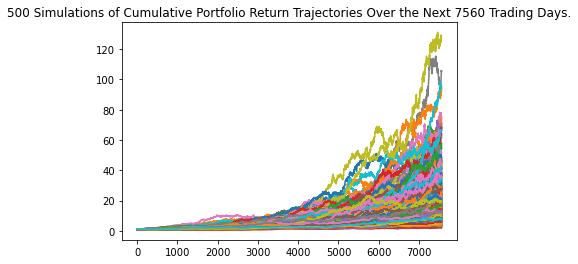

In [19]:
# Plot simulation outcomes
line_plot = MC_agg_spy.plot_simulation()

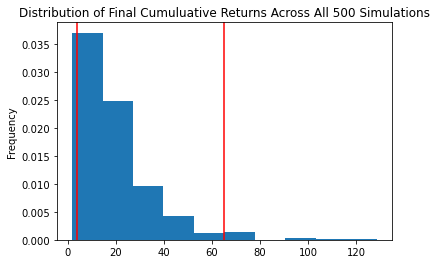

In [20]:
# Plot probability distribution and confidence intervals
bar_plot = MC_agg_spy.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_agg_spy.summarize_cumulative_return()
summary
# Print summary statistics
#print(summary)

count           500.000000
mean             20.024040
std              15.605635
min               1.874867
25%               9.911201
50%              15.404285
75%              24.377935
max             128.506176
95% CI Lower      4.009157
95% CI Upper     64.925827
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [25]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(initial_investment * summary[8],2)
ci_upper = round(initial_investment * summary[9],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $80183.13 and $1298516.55


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [26]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(initial_investment * summary[8],2)
ci_upper = round(initial_investment * summary[9],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $120274.7 and $1947774.82


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [39]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 500
MC_five = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.2,.8],
    num_simulation = num_sims,
    num_trading_days = 1260
)

In [40]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999610,0.989455,1.014255,1.002127,0.994417,0.986426,0.984753,1.018119,1.007909,0.970426,...,0.994373,1.009581,1.005114,1.011778,0.985102,1.005224,0.992929,0.994046,1.002208,0.989236
2,1.011925,0.984554,1.013915,0.983022,0.986908,0.996624,0.984095,1.027603,1.015767,0.975614,...,0.998115,1.002155,1.013291,1.009138,0.995069,1.007146,0.981406,1.012058,0.991629,1.007522
3,1.019516,0.993362,1.017015,0.988597,0.987648,0.988828,0.982061,1.041009,1.028655,0.988558,...,0.999541,0.986771,1.006846,1.017008,0.998163,1.035852,0.988615,1.008937,0.991374,1.010054
4,1.029528,0.969658,1.041640,0.993411,0.990681,0.959691,0.985149,1.052022,1.031496,0.997160,...,0.997996,0.988980,1.010703,1.021094,1.022241,1.009581,1.003740,1.030732,0.997032,0.993527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.630809,1.526237,2.499689,2.240507,2.140845,2.872044,2.742488,1.621509,2.393610,2.306366,...,1.353448,3.568162,2.054496,0.964581,1.169576,1.682863,5.475691,3.426984,1.359440,3.248029
1257,2.624642,1.536292,2.543726,2.254679,2.150872,2.863792,2.773700,1.638253,2.367074,2.288505,...,1.360828,3.605644,2.059523,0.975284,1.195706,1.671054,5.501996,3.427112,1.357591,3.276874
1258,2.623645,1.512502,2.545187,2.283817,2.149626,2.889315,2.747819,1.624220,2.389326,2.247754,...,1.383269,3.570328,2.053649,0.981957,1.204194,1.687848,5.582081,3.358174,1.358198,3.265979
1259,2.574831,1.532505,2.591705,2.278490,2.136131,2.859102,2.712937,1.647144,2.381379,2.276693,...,1.392396,3.569557,2.074051,0.981566,1.203504,1.706945,5.607444,3.308611,1.330728,3.293973


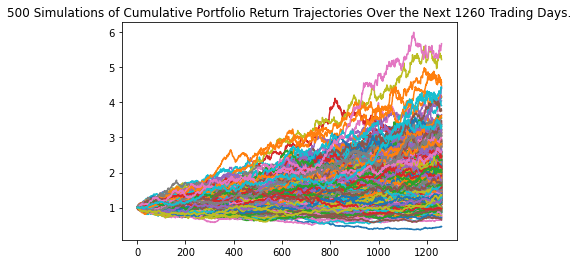

In [41]:
# Plot simulation outcomes
line_plot = MC_five.plot_simulation()

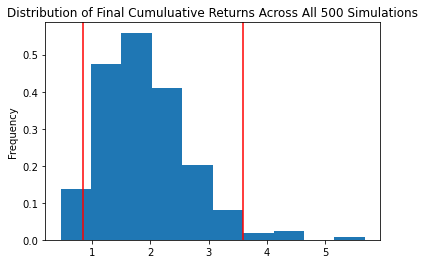

In [42]:
# Plot probability distribution and confidence intervals
bar_plot = MC_five.plot_distribution()

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_five.summarize_cumulative_return()

# Print summary statistics
print(summary)

count           500.000000
mean              1.911577
std               0.740402
min               0.456544
25%               1.363290
50%               1.796064
75%               2.308803
max               5.678569
95% CI Lower      0.845928
95% CI Upper      3.593719
Name: 1260, dtype: float64


In [44]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(initial_investment * summary[8],2)
ci_upper_five = round(initial_investment * summary[9],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $50755.67 and $215623.17


### Ten Years Retirement Option

In [45]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims = 500
MC_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.2,.8],
    num_simulation = num_sims,
    num_trading_days = 2520
)

In [46]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.984685,1.012615,1.008177,0.994868,0.990326,0.993892,0.993829,0.987853,0.994867,1.003924,...,0.997514,1.003278,0.992649,1.034195,1.004044,0.990137,1.004904,1.012278,1.003260,1.031053
2,0.984288,1.004635,0.995893,0.991847,1.000218,0.990796,1.012270,0.981524,0.977784,1.027991,...,0.999158,0.989711,0.992733,1.035802,1.019760,0.983455,1.006405,1.023874,1.010370,1.025326
3,0.992304,1.016816,1.017559,0.963572,1.010840,1.002279,1.008604,0.972669,0.948468,1.026756,...,1.005717,0.984991,1.001870,1.031273,1.010911,0.974714,1.004558,1.023183,0.998391,1.029323
4,0.999688,1.030985,1.028713,0.956955,1.021978,1.027598,1.017617,0.970620,0.956291,1.039973,...,1.000920,0.987368,0.986458,1.027952,1.008656,0.971458,1.010749,1.036983,1.001492,1.035988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.014583,4.535443,1.751898,5.281904,2.446936,1.301129,3.402418,2.961553,2.599395,2.514508,...,2.430293,4.514360,1.639414,3.171984,2.425913,1.384350,0.803800,1.257090,3.234646,3.019163
2517,3.008994,4.524218,1.755646,5.308524,2.455933,1.297122,3.392562,2.976105,2.623351,2.526908,...,2.443130,4.489323,1.651894,3.157333,2.424144,1.390301,0.798275,1.255448,3.249160,3.064936
2518,2.995295,4.586023,1.742193,5.129174,2.438313,1.307711,3.394307,3.027391,2.613700,2.539399,...,2.453552,4.446794,1.681347,3.209675,2.444435,1.402458,0.808607,1.251966,3.209405,3.105350
2519,2.966768,4.581575,1.759916,5.173798,2.459116,1.320158,3.326273,2.962431,2.631052,2.583083,...,2.440993,4.412453,1.700015,3.212918,2.430531,1.386547,0.813287,1.266592,3.188075,3.098384


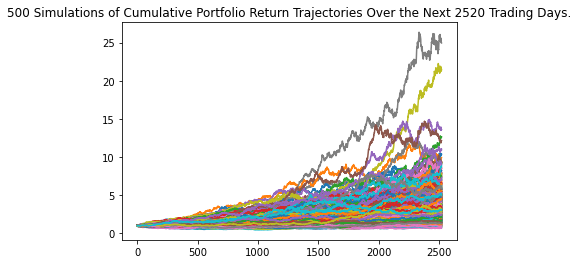

In [47]:
# Plot simulation outcomes
line_plot = MC_ten.plot_simulation()

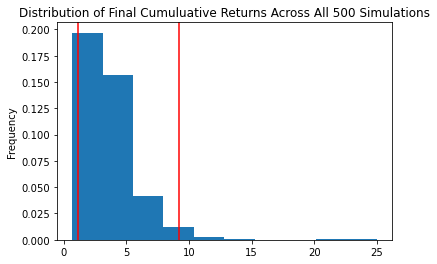

In [48]:
# Plot probability distribution and confidence intervals
bar_plot = MC_ten.plot_distribution()

In [49]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_ten.summarize_cumulative_return()

# Print summary statistics
print(summary)

count           500.000000
mean              3.683974
std               2.336151
min               0.674163
25%               2.240070
50%               3.179421
75%               4.519017
max              24.959337
95% CI Lower      1.178343
95% CI Upper      9.170506
Name: 2520, dtype: float64


In [50]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = initial_investment * summary[8]
ci_upper_ten = initial_investment * summary[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $70700.59541919333 and $550230.3439507287
